<a href="https://colab.research.google.com/github/kursatkara/MAE_5020_Spring_2025/blob/master/06_03_simple_nn_hand_calculation_with_pythorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network from Scratch in PyTorch  
### Architecture: 2 Input → 3 Hidden → 2 Output Neurons

Epoch 0: Loss = 0.4122
Epoch 10: Loss = 0.2309
Epoch 20: Loss = 0.1044
Epoch 30: Loss = 0.0566
Epoch 40: Loss = 0.0370

Final prediction: [[0.8473261 0.1792947]]
Gradients:
dL/dW2:
 tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
dL/db2:
 tensor([[0., 0.]])
dL/dW1:
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
dL/db1:
 tensor([[0., 0., 0.]])
Weights
W2:
 tensor([[ 0.8807, -0.6151],
        [ 0.9233,  0.8968],
        [-1.2729, -1.7694]], requires_grad=True)
b2:
 tensor([[1.6184, 0.0837]], requires_grad=True)
W1:
 tensor([[ 0.3499,  0.0808,  0.3150],
        [ 0.2515, -1.1997, -0.0575]], requires_grad=True)
b1:
 tensor([[ 2.2346, -0.7341,  0.6227]], requires_grad=True)

Final prediction: [[0.8473261 0.1792947]]


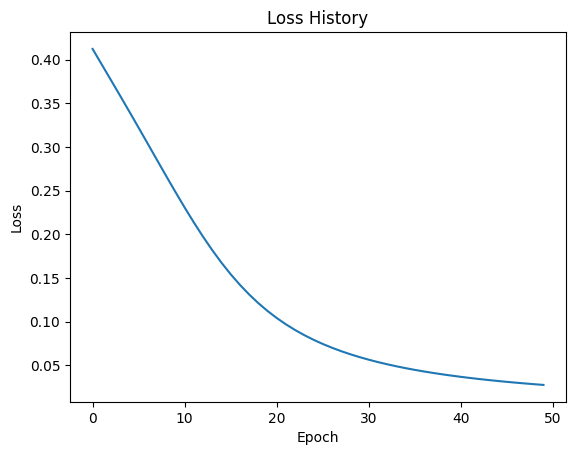

In [8]:
import torch

# Set seed for reproducibility
torch.manual_seed(42)

# Hyperparameters
input_size = 2
hidden_size = 3
output_size = 2
lr = 0.3
epochs = 50

# Sample training data (1 sample)
x = torch.tensor([[0.5, 0.8]], dtype=torch.float32)
y_true = torch.tensor([[1.0, 0.0]], dtype=torch.float32)

# Initialize weights and biases
W1 = torch.randn((input_size, hidden_size), requires_grad=True)
b1 = torch.randn((1, hidden_size), requires_grad=True)
W2 = torch.randn((hidden_size, output_size), requires_grad=True)
b2 = torch.randn((1, output_size), requires_grad=True)

# Training loop
loss_history = []
for epoch in range(epochs):
    # Forward pass
    z1 = x @ W1 + b1
    a1 = torch.sigmoid(z1)
    z2 = a1 @ W2 + b2
    y_pred = torch.sigmoid(z2)

    # Mean squared error loss
    loss = torch.mean((y_true - y_pred) ** 2)
    loss_history.append(loss.item())

    # Backward pass
    loss.backward()

    # Gradient descent step
    with torch.no_grad():
        W1 -= lr * W1.grad
        b1 -= lr * b1.grad
        W2 -= lr * W2.grad
        b2 -= lr * b2.grad

        # Zero the gradients
        W1.grad.zero_()
        b1.grad.zero_()
        W2.grad.zero_()
        b2.grad.zero_()

    # Print loss every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# Final prediction
print("\nFinal prediction:", y_pred.detach().numpy())


# Print gradients for verification
print("Gradients:")
print("dL/dW2:\n", W2.grad)
print("dL/db2:\n", b2.grad)
print("dL/dW1:\n", W1.grad)
print("dL/db1:\n", b1.grad)

# Print weights
print("Weights")
print("W2:\n", W2)
print("b2:\n", b2)
print("W1:\n", W1)
print("b1:\n", b1)

# Final prediction
print("\nFinal prediction:", y_pred.detach().numpy())

# Plot loss history
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss History")
plt.show()

